In [1]:
import os
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

### Importing the dataset.

In [2]:
dataset = pd.read_csv("Data/train.csv")
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


Renaming the names of the the columns for better understanding.

In [4]:
dataset = dataset.rename(columns = {"ssc_p": "percentage_in_10",
                                    "hsc_p": "percentage_in_12",
                                    "ssc_b": "is_ssc_board",
                                    "hsc_b": "is_hsc_board",
                                    "hsc_s": "12_subject",
                                    "degree_p": "percentage_in_degree",
                                    "degree_t": "degree_type",
                                    "workex": "has_work_exp",
                                    "etest_p": "percentage_in_placement_exam",
                                    "mba_p": "marks_in_mba",
                                    "status": "selection"})

In [5]:
# Changing the data type of gender from int to object
dataset["gender"] = dataset["gender"].astype("object")

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sl_no                         215 non-null    int64  
 1   gender                        215 non-null    object 
 2   percentage_in_10              215 non-null    float64
 3   is_ssc_board                  215 non-null    object 
 4   percentage_in_12              215 non-null    float64
 5   is_hsc_board                  215 non-null    object 
 6   12_subject                    215 non-null    object 
 7   percentage_in_degree          215 non-null    float64
 8   degree_type                   215 non-null    object 
 9   has_work_exp                  215 non-null    object 
 10  percentage_in_placement_exam  215 non-null    float64
 11  specialisation                215 non-null    object 
 12  marks_in_mba                  215 non-null    float64
 13  selec

### Checking the missing values

As the NaN value in the salary column is because the person is not selected. The NaN values will just be replaced by 0.

In [7]:
# Splitting the dataset into two: one for candidates who were selected and another for those who were not selected.
placed_dataset = dataset[dataset["selection"] == "Placed"].copy()
not_placed_dataset = dataset[dataset["selection"] == "Not Placed"].copy()

In [8]:
placed_dataset.head()

,sl_no,gender,percentage_in_10,is_ssc_board,percentage_in_12,is_hsc_board,12_subject,percentage_in_degree,degree_type,has_work_exp,percentage_in_placement_exam,specialisation,marks_in_mba,selection,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,0,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


In [9]:
placed_dataset["salary"].isna().sum()

0

This makes it clear that all the candidates who got selected has som value in the salary column.

In [10]:
not_placed_dataset.head()

,sl_no,gender,percentage_in_10,is_ssc_board,percentage_in_12,is_hsc_board,12_subject,percentage_in_degree,degree_type,has_work_exp,percentage_in_placement_exam,specialisation,marks_in_mba,selection,salary
3,4,0,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
5,6,0,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,1,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
9,10,0,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
12,13,1,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NaN


In [11]:
not_placed_dataset["salary"].value_counts()

Series([], Name: count, dtype: int64)

This makes it clear that all the candidates who do not get selected has salary "NaN" marked.

In [12]:
dataset["salary"] = dataset["salary"].fillna(0)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sl_no                         215 non-null    int64  
 1   gender                        215 non-null    object 
 2   percentage_in_10              215 non-null    float64
 3   is_ssc_board                  215 non-null    object 
 4   percentage_in_12              215 non-null    float64
 5   is_hsc_board                  215 non-null    object 
 6   12_subject                    215 non-null    object 
 7   percentage_in_degree          215 non-null    float64
 8   degree_type                   215 non-null    object 
 9   has_work_exp                  215 non-null    object 
 10  percentage_in_placement_exam  215 non-null    float64
 11  specialisation                215 non-null    object 
 12  marks_in_mba                  215 non-null    float64
 13  selec

Performing EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

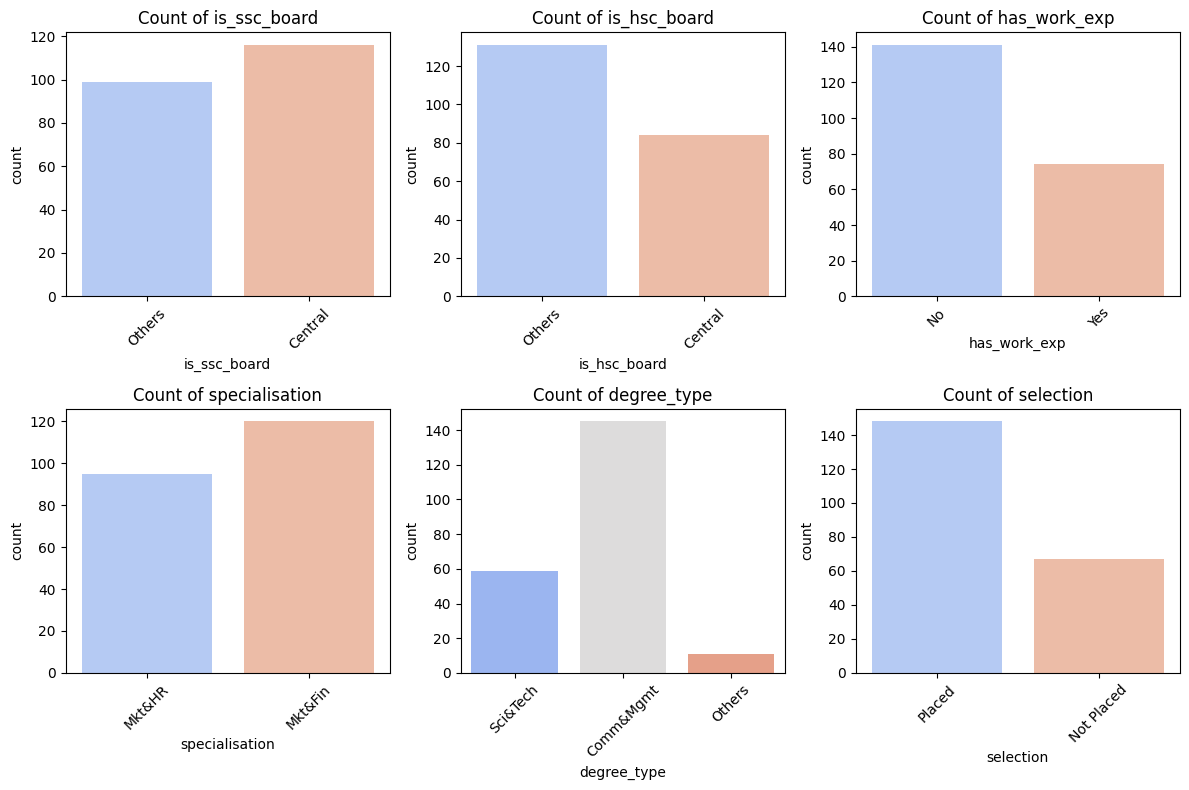

In [15]:
categorical_columns = ["is_ssc_board", "is_hsc_board", "has_work_exp", 
                       "specialisation", "degree_type", "selection"]

plt.figure(figsize = (12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data = dataset, 
                  x = col, 
                  palette = "coolwarm")
    plt.xticks(rotation = 45)
    plt.title(f"Count of {col}")

plt.tight_layout()
plt.show()

Almost all the columns has same proportion of different categories, other than the "degree_type".

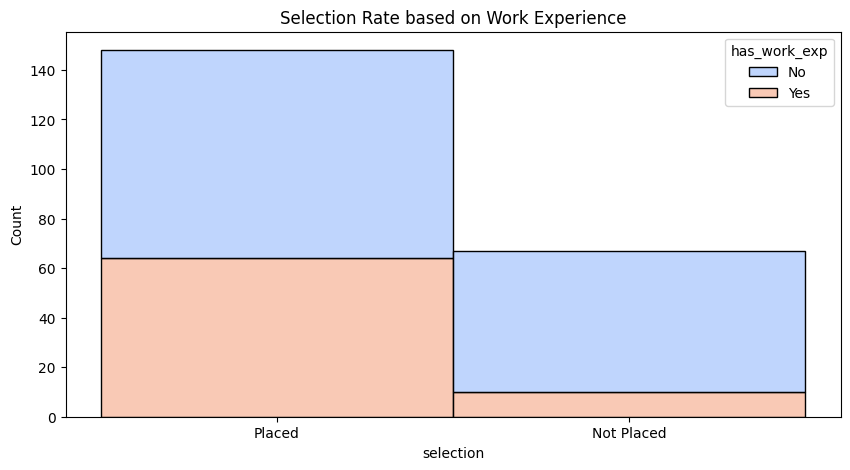

In [16]:
plt.figure(figsize = (10, 5))
sns.histplot(data = dataset, 
             x = "selection",
             hue = "has_work_exp", 
             multiple = "stack",
             palette = "coolwarm")
plt.title("Selection Rate based on Work Experience")
plt.show()

It can be noted that most of the proportion of people who didn't get hired are people without experience.

In [17]:
dataset_copy = dataset.copy()

exp_label = {
    "Yes": 1,
    "No": 0
}

placed_dic = {
    "Placed": 1,
    "Not Placed": 0
}

dataset_copy["has_work_exp"] = dataset_copy["has_work_exp"].map(exp_label)
dataset_copy["selection"] = dataset_copy["selection"].map(placed_dic)

In [18]:
num_cols = dataset.select_dtypes(include = "number").columns.tolist()

num_cols

['sl_no',
 'percentage_in_10',
 'percentage_in_12',
 'percentage_in_degree',
 'percentage_in_placement_exam',
 'marks_in_mba',
 'salary']

In [19]:
num_cols_corr = ["sl_no",
                "percentage_in_10",
                "percentage_in_12",
                "percentage_in_degree",
                "has_work_exp",
                "percentage_in_placement_exam",
                "marks_in_mba",
                "selection",
                "salary"]

num_cols_corr

['sl_no',
 'percentage_in_10',
 'percentage_in_12',
 'percentage_in_degree',
 'has_work_exp',
 'percentage_in_placement_exam',
 'marks_in_mba',
 'selection',
 'salary']

##### Correlation with salary will be analyzed only for candidates who are placed, as it is irrelevant for those who are not placed.

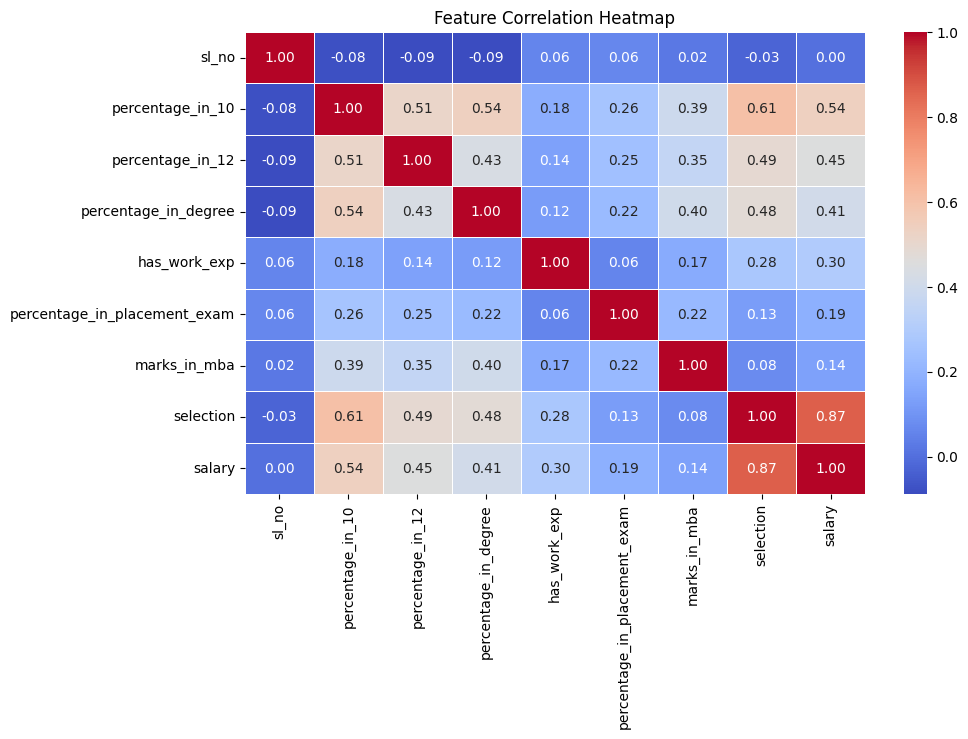

In [20]:
plt.figure(figsize = (10, 6))
sns.heatmap(dataset_copy[num_cols_corr].corr(), 
            annot = True, 
            cmap = "coolwarm", 
            fmt = ".2f", 
            linewidths = 0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Prior academic performance (10th grade) is the strongest predictor of selection, while current academic scores (MBA & placement exam) show minimal impact.

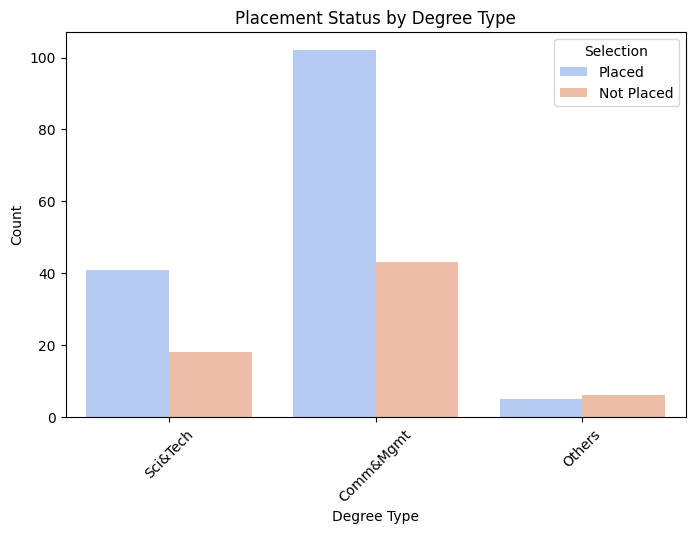

In [21]:
plt.figure(figsize=(8, 5))

# Create a count plot to compare degree_type with selection (Placed/Not Placed)
sns.countplot(data = dataset, 
              x = "degree_type", 
              hue = "selection", 
              palette = "coolwarm")

# Add labels and title
plt.xlabel("Degree Type")
plt.ylabel("Count")
plt.title("Placement Status by Degree Type")
plt.xticks(rotation = 45)
plt.legend(title = "Selection")

# Show plot
plt.show()

Commerce & Management graduates have the highest placement rate, followed by Science & Technology, while candidates with "Other" degrees have the lowest placement chances.

#### Insights on the data:
- Almost all columns have a similar proportion of different categories, except for "degree_type".
- A significant proportion of people who did not get hired are those without work experience.
- Salary is highly correlated with the marks obtained in MBA and the placement exam, followed by percentag in 12th.
- Commerce & Management graduates have the highest placement rate, followed by Science & Technology, while candidates with "Other" degrees have the lowest placement chances.

#### Encoding

In [22]:
dataset.head()

,sl_no,gender,percentage_in_10,is_ssc_board,percentage_in_12,is_hsc_board,12_subject,percentage_in_degree,degree_type,has_work_exp,percentage_in_placement_exam,specialisation,marks_in_mba,selection,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [23]:
# To check whether there is any dupliucate value or not.
dataset["sl_no"].nunique() == len(dataset)

True

Checking the categorical values in each column to determine which encoding technique to use.

In [24]:
cat_columns = dataset.select_dtypes(include = ["object"]).columns.tolist()

for col in cat_columns:
    print(f"Unique values in the column {col}: {dataset[col].unique()}")

Unique values in the column gender: [0 1]
Unique values in the column is_ssc_board: ['Others' 'Central']
Unique values in the column is_hsc_board: ['Others' 'Central']
Unique values in the column 12_subject: ['Commerce' 'Science' 'Arts']
Unique values in the column degree_type: ['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique values in the column has_work_exp: ['No' 'Yes']
Unique values in the column specialisation: ['Mkt&HR' 'Mkt&Fin']
Unique values in the column selection: ['Placed' 'Not Placed']


- Label Encoding will be applied on the "has_work_exp", "selection" columns.
- One Hot Encoding will be used on all the other columns. 

In [25]:
ohe_cols = [col for col in cat_columns if col not in ["has_work_exp", "selection"]]

In [26]:
print(f"Ohe Columns: {ohe_cols}")

Ohe Columns: ['gender', 'is_ssc_board', 'is_hsc_board', '12_subject', 'degree_type', 'specialisation']


In [27]:
from sklearn.preprocessing import OneHotEncoder

Applying One-Hot encoding

In [28]:
encoder = OneHotEncoder(sparse_output = False)
encoded_data = encoder.fit_transform(dataset[ohe_cols])

In [29]:
encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out(ohe_cols))

Applying Label Encoding

In [30]:
exp_label = {
    "Yes": 1,
    "No": 0
}

placed_dic = {
    "Placed": 1,
    "Not Placed": 0
}

dataset["has_work_exp"] = dataset["has_work_exp"].map(exp_label)
dataset["selection"] = dataset["selection"].map(placed_dic)

Concating all the dataframes together.

In [31]:
dataset_new = pd.concat([encoded_df, dataset["has_work_exp"], dataset[num_cols], dataset["selection"]], axis = 1)

In [32]:
dataset_new.head()

,gender_0,gender_1,is_ssc_board_Central,is_ssc_board_Others,is_hsc_board_Central,is_hsc_board_Others,12_subject_Arts,12_subject_Commerce,12_subject_Science,degree_type_Comm&Mgmt,...,specialisation_Mkt&HR,has_work_exp,sl_no,percentage_in_10,percentage_in_12,percentage_in_degree,percentage_in_placement_exam,marks_in_mba,salary,selection
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0,1,67.00,91.00,58.00,55.0,58.80,270000.0,1
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1,2,79.33,78.33,77.48,86.5,66.28,200000.0,1
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0,3,65.00,68.00,64.00,75.0,57.80,250000.0,1
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0,4,56.00,52.00,52.00,66.0,59.43,0.0,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0,5,85.80,73.60,73.30,96.8,55.50,425000.0,1


In [33]:
# Name of all the columns in thenew dataset
dataset_new.columns.tolist()

['gender_0',
 'gender_1',
 'is_ssc_board_Central',
 'is_ssc_board_Others',
 'is_hsc_board_Central',
 'is_hsc_board_Others',
 '12_subject_Arts',
 '12_subject_Commerce',
 '12_subject_Science',
 'degree_type_Comm&Mgmt',
 'degree_type_Others',
 'degree_type_Sci&Tech',
 'specialisation_Mkt&Fin',
 'specialisation_Mkt&HR',
 'has_work_exp',
 'sl_no',
 'percentage_in_10',
 'percentage_in_12',
 'percentage_in_degree',
 'percentage_in_placement_exam',
 'marks_in_mba',
 'salary',
 'selection']

### Data Splitting

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
y = dataset_new[["selection", "salary"]]
X = dataset_new.drop(["selection", "salary"], axis = 1)

In [36]:
y.columns.tolist()

['selection', 'salary']

In [37]:
X.columns.tolist()

['gender_0',
 'gender_1',
 'is_ssc_board_Central',
 'is_ssc_board_Others',
 'is_hsc_board_Central',
 'is_hsc_board_Others',
 '12_subject_Arts',
 '12_subject_Commerce',
 '12_subject_Science',
 'degree_type_Comm&Mgmt',
 'degree_type_Others',
 'degree_type_Sci&Tech',
 'specialisation_Mkt&Fin',
 'specialisation_Mkt&HR',
 'has_work_exp',
 'sl_no',
 'percentage_in_10',
 'percentage_in_12',
 'percentage_in_degree',
 'percentage_in_placement_exam',
 'marks_in_mba']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Model Selection

In [39]:
y_train["selection"].value_counts()

selection
1    103
0     47
Name: count, dtype: int64

Null Accuracy:

The accuracy achieved by the model when it will predict only the highest occuring class. Here, out of 150, 103 are positive.

Null accuracy for this project:

$$
    \text{Null Accuracy} = \frac{\text{Number of instances of the most frequent class}}{\text{Total number of instances in the dataset}}
$$


$$
    \text{Null Accuracy} = \frac{103}{150} \approx 0.6867 \quad \text{or} \quad 68.67\%
$$

Thus, we need to make a model that will be better than this threshold.

In [40]:
null_accuracy = 68.67

The model needed in this situation will be a classification model. Below are the names of the models that will be used:
- Logistic Regression
- Random Forest
- Deep Learning Model using PyTorch
- SVM

1. Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
lr_model = LogisticRegression()

In [43]:
lr_model.fit(X_train, y_train["selection"])

LogisticRegression()

In [44]:
lr_preds = lr_model.predict(X_test)

In [45]:
accuracy_score(y_test["selection"], lr_preds)

0.8615384615384616

In [46]:
lr_acc = accuracy_score(y_test["selection"], lr_preds)
lr_acc

0.8615384615384616

In [47]:
import pickle
os.makedirs("models", exist_ok = True)

In [48]:
with open("models/logistic_model.pkl", "wb") as file:
    pickle.dump(lr_model, file)

2. Random Forest Model

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier()

In [51]:
rf.fit(X_train, y_train["selection"])

RandomForestClassifier()

In [52]:
rf_preds = rf.predict(X_test)

In [53]:
accuracy_score(y_test["selection"], rf_preds)

0.8923076923076924

Accuracy with the base random forest model.

Fine tuning hyper parameters

In [54]:
def errors_df_combo(estimators, max_depth):
    results = []  # Create an empty list to store the results
    for depth in max_depth:
        for estimator in estimators:

            # Defining the Model
            model = RandomForestClassifier(n_estimators = estimator, max_depth = depth, random_state = 42)

            # Training the model
            model.fit(X_train, y_train["selection"])

            # Errors and Scores
            train_accuracy = model.score(X_train, y_train["selection"])
            test_accuracy = model.score(X_test, y_test["selection"])

            # Append each result as a dictionary to the list
            results.append({"Max_Depth": depth,
                            "Number_of_Trees": estimator,
                            "Training_Accuracy": train_accuracy,
                            "Test_Accuracy": test_accuracy})
    return results

In [55]:
estimators = [i * 50 for i in range(1, 7)]
max_dept = [i for i in range(1, 11)]

In [56]:
model_perfomance = errors_df_combo(estimators = estimators,
                                   max_depth = max_dept)

In [57]:
rf_model_perf = pd.DataFrame(model_perfomance)

In [58]:
rf_model_perf.sort_values("Test_Accuracy", ascending = False).head()

,Max_Depth,Number_of_Trees,Training_Accuracy,Test_Accuracy
54,10,50,1.0,0.892308
43,8,100,1.0,0.876923
48,9,50,1.0,0.876923
50,9,150,1.0,0.876923
51,9,200,1.0,0.876923


All models with a Training Accuracy of 1 are considered overfitted. I will only consider the models with the highest Test Accuracy where the difference between Training Accuracy and Test Accuracy is 8% or less.

In [59]:
rf_acc = rf_model_perf[rf_model_perf["Training_Accuracy"] - rf_model_perf["Test_Accuracy"] <= 0.08].sort_values("Test_Accuracy", ascending = False).head()

In [60]:
rf_acc

,Max_Depth,Number_of_Trees,Training_Accuracy,Test_Accuracy
29,5,300,0.933333,0.861538
28,5,250,0.933333,0.861538
27,5,200,0.933333,0.861538
26,5,150,0.933333,0.861538
22,4,250,0.913333,0.846154


The Highest test accuracy without getting overfitting is with:
- n_estimators = 300
- max_depth = 5

In [61]:
rf_best_model = RandomForestClassifier(n_estimators = 300,
                                       max_depth = 5,
                                       random_state = 42)

rf_best_model.fit(X_train, y_train["selection"])

rf_best_pred = rf_best_model.predict(X_test)

rf_best_acc = accuracy_score(y_test["selection"], rf_best_pred)

rf_best_acc

0.8615384615384616

In [62]:
with open("models/rf_best_model.pkl", "wb") as file:
    pickle.dump(rf_best_model, file)

3. Deep Learning Model

For the Deep Learning, I will be creating 2 models:
- To predict whether the candidate will be selected or not
- If the candidate is selected, then it will predict the salary.

In [63]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import keras
from tensorflow.keras.saving import register_keras_serializable

tf.random.set_seed(0)

In [64]:
@register_keras_serializable()
class ClassificationModel(Model):
    def __init__(self, input_dim):
        super(ClassificationModel, self).__init__()

        # Input layer
        self.input_layer = layers.Dense(128, activation = "relu", input_dim = input_dim)
        
        # Block 1
        self.block1 = [
            layers.Dense(256, activation = "relu"),
            layers.Dense(1024, activation = "relu"),
            layers.BatchNormalization()
        ]
        
        # Block 2
        self.block2 = [
            layers.Dense(256, activation = "relu"),
            layers.Dense(1024, activation = "relu"),
            layers.BatchNormalization()
        ]
        
        # Block 3
        self.block3 = [
            layers.Dense(256, activation = "relu"),
            layers.Dense(1024, activation = "relu"),
            layers.BatchNormalization()
        ]
        
        # Merge and Final layers
        self.merge = layers.Concatenate()
        self.final_dense1 = layers.Dense(512, activation = "relu")
        self.final_dense2 = layers.Dense(128, activation = "relu")
        self.final_bn = layers.BatchNormalization()

        self.final_dropout = layers.Dropout(0.2)

        self.output_layer = layers.Dense(1, activation = "sigmoid", name = "classification")

    def process_block(self, x, block_layers):
        for layer in block_layers:
            x = layer(x)
        return x

    def call(self, inputs):
        # Initial shared processing
        x = self.input_layer(inputs)
        
        # Process each block independently
        block1_output = self.process_block(x, self.block1)
        block2_output = self.process_block(x, self.block2)
        block3_output = self.process_block(x, self.block3)
        
        # Merge blocks
        merged = self.merge([block1_output, block2_output, block3_output])
        
        # Final processing
        x = self.final_dense1(merged)
        x = self.final_dense2(x)
        x = self.final_bn(x)
        x = self.final_dropout(x)
        
        return self.output_layer(x)

In [65]:
mlp_classification_model = ClassificationModel(input_dim = X_train.shape[1])

mlp_classification_model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy", "AUC", "Precision", "Recall"]
)

history = mlp_classification_model.fit(
    X_train,
    y_train["selection"],
    validation_data = (X_test, y_test["selection"]),
    epochs = 50,
    batch_size = 32
)



Epoch 1/50


5/5 [==============================] - 3s 95ms/step - loss: 0.6333 - accuracy: 0.7133 - auc: 0.8276 - precision: 0.8750 - recall: 0.6796 - val_loss: 6.9412 - val_accuracy: 0.6923 - val_auc: 0.5000 - val_precision: 0.6923 - val_recall: 1.0000
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.4262 - accuracy: 0.8067 - auc: 0.8835 - precision: 0.8776 - recall: 0.8350 - val_loss: 1.7738 - val_accuracy: 0.6923 - val_auc: 0.6389 - val_precision: 0.6923 - val_recall: 1.0000
Epoch 3/50
5/5 [==============================] - 0s 21ms/step - loss: 0.4176 - accuracy: 0.8067 - auc: 0.8779 - precision: 0.8700 - recall: 0.8447 - val_loss: 0.5584 - val_accuracy: 0.8000 - val_auc: 0.8667 - val_precision: 0.7759 - val_recall: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 22ms/step - loss: 0.4656 - accuracy: 0.8067 - auc: 0.8932 - precision: 0.8854 - recall: 0.8252 - val_loss: 4.1042 - val_accuracy: 0.6923 - val_auc: 0.5000 - val_precision: 0.6923 - val

In [66]:
mlp_classification_model.save("models/mlp_classification_model.keras")

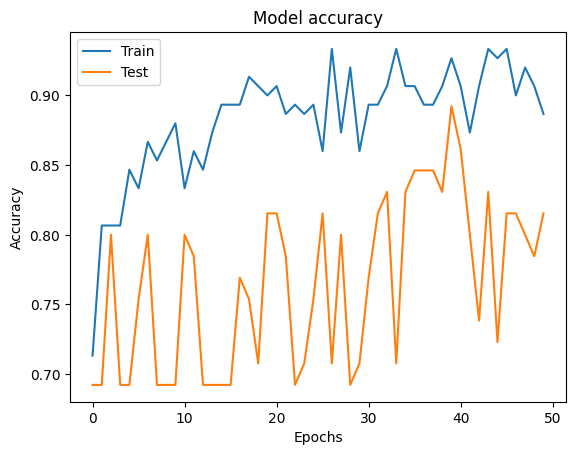

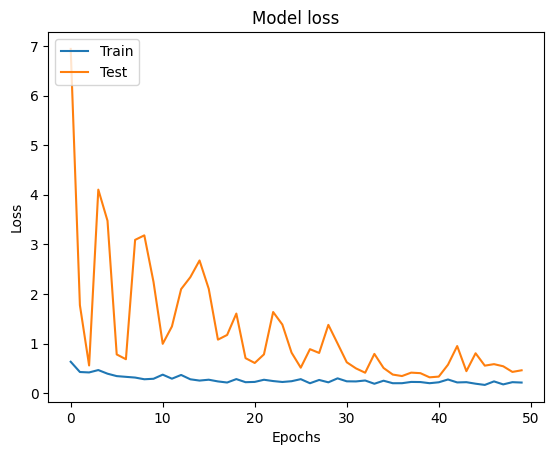

In [67]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()


In [68]:
class SalaryPredictor(Model):
    def __init__(self, input_dim):
        super(SalaryPredictor, self).__init__()
        self.dense1 = layers.Dense(128, input_dim = input_dim)
        self.leaky1 = layers.LeakyReLU(alpha = 0.01)
        self.batchnorm1 = layers.BatchNormalization()

        self.dense2 = layers.Dense(64)
        self.leaky2 = layers.LeakyReLU(alpha = 0.01)
        self.batchnorm2 = layers.BatchNormalization()

        self.dense3 = layers.Dense(32)
        self.leaky3 = layers.LeakyReLU(alpha = 0.01)
        self.batchnorm3 = layers.BatchNormalization()
        self.dense4 = layers.Dense(16)
        self.leaky4 = layers.LeakyReLU(alpha = 0.01)
        self.batchnorm4 = layers.BatchNormalization()
        
        self.output_layer = layers.Dense(1, activation = "linear")

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.leaky1(x)
        x = self.batchnorm1(x)

        x = self.dense2(x)
        x = self.leaky2(x)
        x = self.batchnorm2(x)

        x = self.dense3(x)
        x = self.leaky3(x)
        x = self.batchnorm3(x)

        x = self.dense4(x)
        x = self.leaky4(x)
        x = self.batchnorm4(x)

        return self.output_layer(x)

Model will only be trained on the salary data when the selection is "Placed".

In [69]:
mask = y_train["selection"] == 1
mask_test = y_test["selection"] == 1

In [70]:
X_train_salary = X_train[mask]
y_train_salary = y_train[mask]

X_test_salary = X_test[mask_test]
y_test_salary = y_test[mask_test]

In [71]:
input_dim = X_train_salary.shape[1]
model_salary = SalaryPredictor(input_dim)

Custome fucntions for loss and metrics

In [72]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

def r2_score(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - (ss_res / (ss_tot + K.epsilon()))

In [73]:
# Compile the model with custom R² metric
model_salary.compile(optimizer = "adam", 
                     loss = rmse, 
                     metrics = [r2_score])

# Train the model
history = model_salary.fit(X_train_salary, 
                           y_train_salary["salary"], 
                           validation_data = (X_test_salary, y_test_salary["salary"]), 
                           epochs = 50, 
                           batch_size = 16)


Epoch 1/50
7/7 [==============================] - 2s 32ms/step - loss: 311191.3125 - r2_score: -14.2818 - val_loss: 272352.1250 - val_r2_score: -58.6439
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 314580.2500 - r2_score: -13.3724 - val_loss: 272350.2188 - val_r2_score: -58.6430
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 312149.8125 - r2_score: -24.7566 - val_loss: 272348.7500 - val_r2_score: -58.6423
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 313437.5312 - r2_score: -16.7463 - val_loss: 272347.9688 - val_r2_score: -58.6419
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 312863.5000 - r2_score: -20.0350 - val_loss: 272347.0938 - val_r2_score: -58.6415
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 312257.9062 - r2_score: -20.2814 - val_loss: 272346.5000 - val_r2_score: -58.6413
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 313607.4062 - r2_

In [74]:
with open("models/mlp_salary_model.pkl", "wb") as file:
    pickle.dump(model_salary, file)

4. SVM

In [75]:
from sklearn.svm import SVC

In [76]:
svm_model = SVC(kernel = "poly")

svm_model.fit(X_train, y_train["selection"])

svm_model_pred = svm_model.predict(X_test)

svm_model_acc = accuracy_score(y_test["selection"], svm_model_pred)

svm_model_acc

0.8

In [77]:
with open("models/svm_model.pkl", "wb") as file:
    pickle.dump(svm_model, file)

## Model Evaluation

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [79]:
# List of models and their names
models = [lr_model, rf_best_model, mlp_classification_model, svm_model]
model_names = ["Logistic Regression", "Random Forest", "Keras DL Model", "SVM Model"]

In [80]:
# Store evaluation results
results = []

for model, name in zip(models, model_names):
    if name == "Keras DL Model":
        # Keras model requires predict() to get probabilities, converting to class labels
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    else:
        # For sklearn models, simply use predict()
        y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test["selection"], y_pred)
    precision = precision_score(y_test["selection"], y_pred)
    recall = recall_score(y_test["selection"], y_pred)
    f1 = f1_score(y_test["selection"], y_pred)
    
    # Append the results
    results.append([name, accuracy, precision, recall, f1])

3/3 [==============================] - 0s 2ms/step


In [81]:
evaluation_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

In [82]:
evaluation_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.861538,0.875000,0.933333,0.903226
1,Random Forest,0.861538,0.846154,0.977778,0.907216
2,Keras DL Model,0.815385,0.811321,0.955556,0.877551
3,SVM Model,0.800000,0.833333,0.888889,0.860215


In [83]:
from sklearn.metrics import confusion_matrix

# Store confusion matrices
confusion_matrices = []

for model, name in zip(models, model_names):
    if name == "Keras DL Model":
        # Keras model requires predict() to get probabilities, converting to class labels
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    else:
        # For sklearn models, simply use predict()
        y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test["selection"], y_pred)
    
    # Append the confusion matrix
    confusion_matrices.append([name, cm])

# Convert confusion matrices to DataFrame for easier viewing
cm_df = pd.DataFrame(confusion_matrices, columns=["Model", "Confusion Matrix"])
print(cm_df)

3/3 [==============================] - 0s 3ms/step
                 Model     Confusion Matrix
0  Logistic Regression   [[14, 6], [3, 42]]
1        Random Forest   [[12, 8], [1, 44]]
2       Keras DL Model  [[10, 10], [2, 43]]
3            SVM Model   [[12, 8], [5, 40]]


In [84]:
cm_df

,Model,Confusion Matrix
0,Logistic Regression,"[[14, 6], [3, 42]]"
1,Random Forest,"[[12, 8], [1, 44]]"
2,Keras DL Model,"[[10, 10], [2, 43]]"
3,SVM Model,"[[12, 8], [5, 40]]"


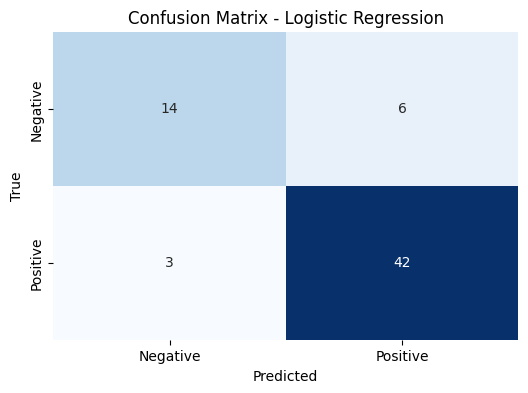

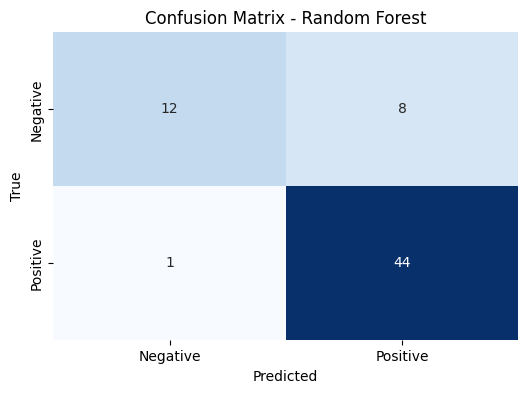

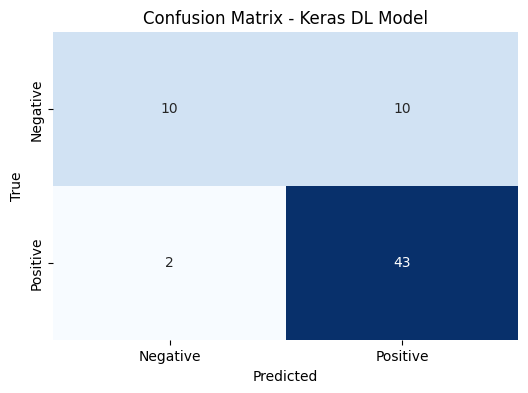

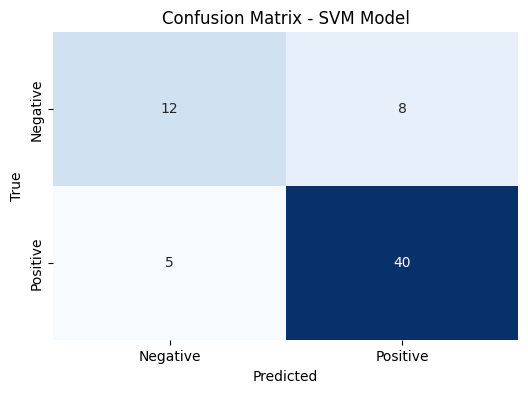

In [85]:
# Define class labels
labels = ["Negative", "Positive"]

# Create a plot for each model's confusion matrix
for model_name, cm in zip(model_names, confusion_matrices):
    # Create a figure and axis
    plt.figure(figsize = (6, 4))
    
    # Plot heatmap for confusion matrix
    sns.heatmap(cm[1], annot = True, fmt = "d", cmap = "Blues", xticklabels = labels, yticklabels = labels, cbar = False)
    
    # Title and labels
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    
    # Show the plot
    plt.show()


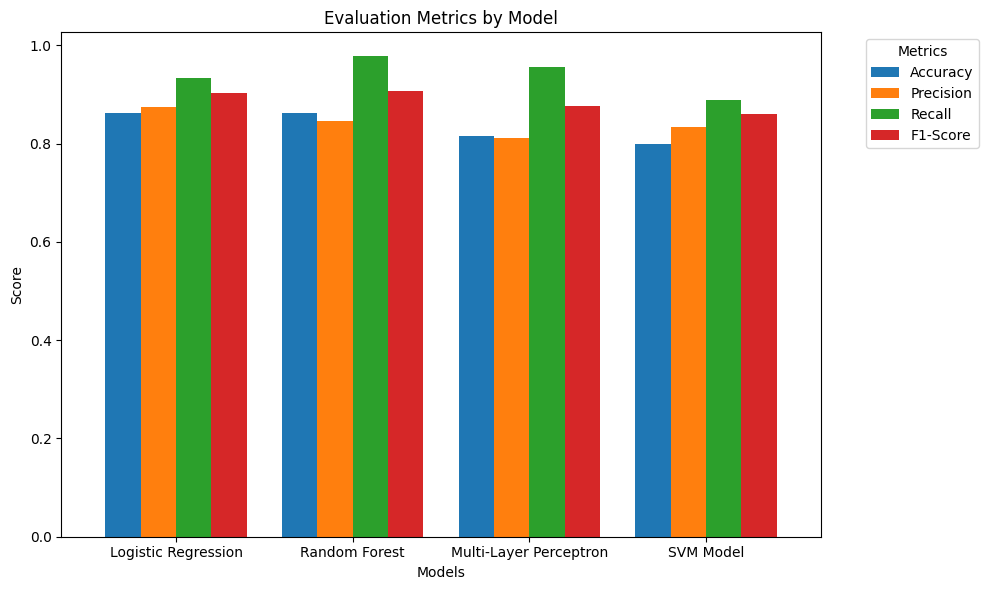

In [86]:
# Define metric names
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Create figure and axis
fig, ax = plt.subplots(figsize = (10, 6))

# Plot each metric as a bar chart
evaluation_df[metrics].plot(kind = "bar", ax = ax, width = 0.8)

# Set x-axis labels to model names
ax.set_xticklabels(["Logistic Regression", "Random Forest", "Multi-Layer Perceptron", "SVM Model"], rotation = 0)

# Add labels, title, and legend
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Evaluation Metrics by Model")
ax.legend(title = "Metrics", bbox_to_anchor = (1.05, 1), loc = "upper left")

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


## Voting Classifier

In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [88]:
model_1 = LogisticRegression(max_iter = 200)
model_2 = RandomForestClassifier(n_estimators = 300, max_depth = 5)
model_3 = SVC(kernel = "linear", probability = True)

In [89]:
voting_clf = VotingClassifier(
    estimators = [("lr", model_1), 
                  ("rf", model_2), 
                  ("svm", model_3)],
    voting = "soft"
)

In [90]:
voting_clf.fit(X_train, y_train["selection"])

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=300)),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [91]:
y_pred_voting_clf = voting_clf.predict(X_test)

In [92]:
accuracy_voting_clf = accuracy_score(y_test["selection"], y_pred_voting_clf)
print(f"Voting Classifier Accuracy: {accuracy_voting_clf}")

Voting Classifier Accuracy: 0.8923076923076924


In [93]:
cm_voting_matrix = []
cm_voting_matrix.append(["Voting Classifier", confusion_matrix(y_test["selection"], y_pred_voting_clf)])
cm_df_voting = pd.DataFrame(cm_voting_matrix, columns = ["Model", "Confusion Matrix"])
cm_df_voting

,Model,Confusion Matrix
0,Voting Classifier,"[[14, 6], [1, 44]]"


In [94]:
cm_df = pd.concat([cm_df, cm_df_voting], axis = 0).reset_index(drop = "index")

In [95]:
cm_df

,Model,Confusion Matrix
0,Logistic Regression,"[[14, 6], [3, 42]]"
1,Random Forest,"[[12, 8], [1, 44]]"
2,Keras DL Model,"[[10, 10], [2, 43]]"
3,SVM Model,"[[12, 8], [5, 40]]"
4,Voting Classifier,"[[14, 6], [1, 44]]"


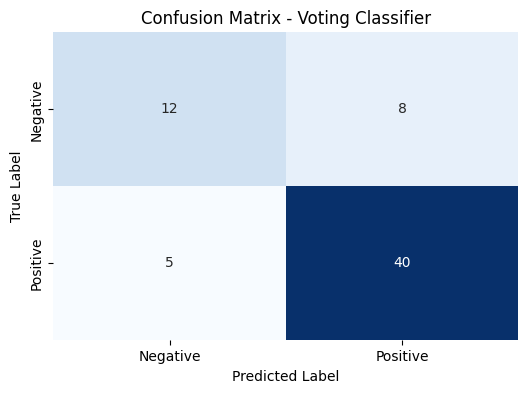

In [96]:
labels = ["Negative", "Positive"]

plt.figure(figsize=(6, 4))

# Use `.iloc` to extract the correct confusion matrix
sns.heatmap(cm_df["Confusion Matrix"].values[3], annot = True, fmt = "d", cmap = "Blues",
            xticklabels = labels, yticklabels = labels, cbar = False)

# Title and labels
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Show the plot
plt.show()


In [97]:
accuracy_voting_clf = accuracy_score(y_test["selection"], y_pred_voting_clf)
precision_voting_clf = precision_score(y_test["selection"], y_pred_voting_clf)
recall_voting_clf = recall_score(y_test["selection"], y_pred_voting_clf)
f1_voting_clf = f1_score(y_test["selection"], y_pred_voting_clf)

In [98]:
# Metrics for Voting Classifier
new_row = pd.DataFrame({
    "Model": ["Voting Classifier"],
    "Accuracy": [accuracy_voting_clf],
    "Precision": [precision_voting_clf],
    "Recall": [recall_voting_clf],
    "F1-Score": [f1_voting_clf]
})

# Append the new row to the DataFrame
evaluation_df = pd.concat([evaluation_df, new_row], ignore_index=True)

In [99]:
evaluation_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.861538,0.875000,0.933333,0.903226
1,Random Forest,0.861538,0.846154,0.977778,0.907216
2,Keras DL Model,0.815385,0.811321,0.955556,0.877551
3,SVM Model,0.800000,0.833333,0.888889,0.860215
4,Voting Classifier,0.892308,0.880000,0.977778,0.926316


The Voting Classifier achieves the highest accuracy of 0.8923 and an F1-score of 0.9263, indicating it effectively balances precision (0.8800) and recall (0.9778). Logistic Regression provides a well-rounded performance with an accuracy of 0.8615, precision of 0.8750, and recall of 0.9333, resulting in an F1-score of 0.9032. The Random Forest model performs similarly, with an accuracy of 0.8615, but has a slightly lower precision of 0.8462, while maintaining a high recall of 0.9778, leading to an F1-score of 0.9072. The Keras Deep Learning Model, despite achieving the lowest accuracy of 0.7692 and precision of 0.7500, excels in recall with a perfect 1.0000, ensuring it captures all positive cases but at the expense of misclassifications. Overall, the Voting Classifier outperforms all individual models, making it the most effective choice by achieving the best balance between precision and recall.